In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Impact_Chat4.csv')
data.head()

,university,influence_on_teaching,group_collaboration_usage,critical_thinking_support,data_privacy_concern,perceived_creativity_reduction,learning_experience_improvement,education_level_Postgraduate,education_level_Undergraduate,academic_chatgpt_use_frequency_Monthly,academic_chatgpt_use_frequency_Never,academic_chatgpt_use_frequency_Weekly
0,75,2,2,2,1,0,2,False,True,False,False,False
1,75,2,1,2,1,2,0,False,True,True,False,False
2,75,2,2,2,0,1,2,False,True,False,False,False
3,75,2,2,2,0,1,2,False,True,False,False,False
4,67,3,2,2,1,2,1,False,True,True,False,False


In [3]:
# Split features and target
X = data.drop('learning_experience_improvement', axis=1)
y = data['learning_experience_improvement']

# Display the encoded dataset
print(X)
print(y)

      university  influence_on_teaching  group_collaboration_usage  \
0             75                      2                          2   
1             75                      2                          1   
2             75                      2                          2   
3             75                      2                          2   
4             67                      3                          2   
...          ...                    ...                        ...   
2679         196                      2                          1   
2680         196                      3                          1   
2681         196                      2                          1   
2682         121                      2                          2   
2683         121                      3                          2   

      critical_thinking_support  data_privacy_concern  \
0                             2                     1   
1                             2              

In [19]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Assuming X_train (DataFrame), y_train (Series or ndarray)

# Step 1: Find class counts to identify minority classes
class_counts = Counter(y_train)
max_count = max(class_counts.values())

print("Class counts in training data:", class_counts)

# Step 2: Prepare to collect synthetic samples and labels
synthetic_samples_list = []
synthetic_labels_list = []

# For each class, if minority, generate synthetic samples
for cls, count in class_counts.items():
    if count < max_count:  # minority class
        print(f"Generating synthetic samples for minority class {cls}...")

        # Select class samples
        X_cls = X_train[y_train == cls]

        # Select numeric columns only and fill NaNs
        X_cls_numeric = X_cls.select_dtypes(include=[np.number]).fillna(0)

        # Scale features [0,1]
        scaler = MinMaxScaler()
        X_cls_scaled = scaler.fit_transform(X_cls_numeric)

        # Convert to tensor
        X_cls_tensor = torch.tensor(X_cls_scaled, dtype=torch.float32)

        # Define your VAE model here (assuming defined elsewhere)
        # vae = VAE(input_dim=X_cls_scaled.shape[1], latent_dim=latent_dim)
        # Train your VAE on X_cls_tensor here...

        # For demonstration, let's assume you have a function:
        # trained_vae = train_vae(X_cls_tensor)
        # synthetic_cls_samples = generate_synthetic_samples(trained_vae, n_samples=(max_count - count))

        # -- Placeholder: Replace below with your actual VAE training & sampling code --
        synthetic_cls_samples = np.tile(X_cls_numeric.values, (max_count - count, 1))  # dummy repeat (replace with VAE output)

        # Collect synthetic samples and labels
        synthetic_samples_list.append(pd.DataFrame(synthetic_cls_samples, columns=X_cls_numeric.columns))
        synthetic_labels_list.append(np.array([cls] * (max_count - count)))

# Step 3: Combine all synthetic samples
if synthetic_samples_list:
    synthetic_data = pd.concat(synthetic_samples_list, ignore_index=True)
    synthetic_labels = np.concatenate(synthetic_labels_list)
else:
    synthetic_data = pd.DataFrame()
    synthetic_labels = np.array([])

# Step 4: Align synthetic data columns with X_train (fill missing columns with 0)
missing_cols = [col for col in X_train.columns if col not in synthetic_data.columns]
for col in missing_cols:
    synthetic_data[col] = 0
synthetic_data = synthetic_data[X_train.columns]  # reorder columns

# Step 5: Combine original and synthetic data
X_train_balanced = pd.concat([X_train, synthetic_data], ignore_index=True)
y_train_balanced = np.concatenate([y_train, synthetic_labels])

print("New class distribution after augmentation:", Counter(y_train_balanced))


Class counts in training data: Counter({2: 1564, 0: 138, 1: 15})
Generating synthetic samples for minority class 1...
Generating synthetic samples for minority class 0...
New class distribution after augmentation: Counter({np.int64(2): 1564, np.int64(1): 1564, np.int64(0): 1564})


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Your VAE model as provided
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc31 = nn.Linear(32, latent_dim)  # mu
        self.fc32 = nn.Linear(32, latent_dim)  # logvar

        self.fc4 = nn.Linear(latent_dim, 32)
        self.fc5 = nn.Linear(32, 64)
        self.fc6 = nn.Linear(64, input_dim)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        h2 = self.relu(self.fc2(h1))
        return self.fc31(h2), self.fc32(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = self.relu(self.fc4(z))
        h5 = self.relu(self.fc5(h4))
        return self.sigmoid(self.fc6(h5))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Function to train VAE for one class
def train_vae(data_tensor, epochs=100, batch_size=16, latent_dim=10, lr=1e-3):
    input_dim = data_tensor.shape[1]
    vae = VAE(input_dim, latent_dim)
    optimizer = optim.Adam(vae.parameters(), lr=lr)
    dataset = TensorDataset(data_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    vae.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            x_batch = batch[0]
            optimizer.zero_grad()
            recon_batch, mu, logvar = vae(x_batch)
            loss = loss_function(recon_batch, x_batch, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        # Optional: print every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}, Loss: {total_loss / len(data_tensor):.4f}")
    return vae

# Function to generate synthetic samples from trained VAE decoder
def generate_synthetic_samples(vae_model, n_samples, latent_dim=10):
    vae_model.eval()
    with torch.no_grad():
        # Sample from standard normal latent space
        z = torch.randn(n_samples, latent_dim)
        samples = vae_model.decode(z)
        samples = samples.cpu().numpy()
    return samples

# Assuming X_train (DataFrame), y_train (array/Series) are defined

class_counts = Counter(y_train)
max_count = max(class_counts.values())

print("Class counts in training data:", class_counts)

synthetic_samples_list = []
synthetic_labels_list = []

for cls, count in class_counts.items():
    if count < max_count:
        print(f"Generating synthetic samples for minority class {cls}...")

        X_cls = X_train[y_train == cls]
        X_cls_numeric = X_cls.select_dtypes(include=[np.number]).fillna(0)

        scaler = MinMaxScaler()
        X_cls_scaled = scaler.fit_transform(X_cls_numeric)
        X_cls_tensor = torch.tensor(X_cls_scaled, dtype=torch.float32)

        # Train VAE
        vae = train_vae(X_cls_tensor, epochs=100, latent_dim=10)

        samples_to_generate = max_count - count
        synthetic_samples = generate_synthetic_samples(vae, samples_to_generate, latent_dim=10)

        # Inverse transform if you want to bring back to original scale
        synthetic_samples_original = scaler.inverse_transform(synthetic_samples)

        synthetic_df = pd.DataFrame(synthetic_samples_original, columns=X_cls_numeric.columns)

        # Add missing columns with zeros
        for col in X_train.columns:
            if col not in synthetic_df.columns:
                synthetic_df[col] = 0
        synthetic_df = synthetic_df[X_train.columns]  # reorder

        synthetic_samples_list.append(synthetic_df)
        synthetic_labels_list.append(np.array([cls] * samples_to_generate))

# Combine synthetic data and original
if synthetic_samples_list:
    synthetic_data = pd.concat(synthetic_samples_list, ignore_index=True)
    synthetic_labels = np.concatenate(synthetic_labels_list)
else:
    synthetic_data = pd.DataFrame()
    synthetic_labels = np.array([])

X_train_balanced = pd.concat([X_train, synthetic_data], ignore_index=True)
y_train_balanced = np.concatenate([y_train, synthetic_labels])

print("New class distribution after augmentation:", Counter(y_train_balanced))


Class counts in training data: Counter({2: 1564, 0: 138, 1: 15})
Generating synthetic samples for minority class 1...
Epoch 10, Loss: 4.1582
Epoch 20, Loss: 3.9137
Epoch 30, Loss: 3.7365
Epoch 40, Loss: 3.5349
Epoch 50, Loss: 3.2433
Epoch 60, Loss: 3.1919
Epoch 70, Loss: 3.1392
Epoch 80, Loss: 2.9591
Epoch 90, Loss: 3.0550
Epoch 100, Loss: 3.0680
Generating synthetic samples for minority class 0...
Epoch 10, Loss: 3.1080
Epoch 20, Loss: 3.0088
Epoch 30, Loss: 3.0046
Epoch 40, Loss: 3.0124
Epoch 50, Loss: 2.9994
Epoch 60, Loss: 2.9899
Epoch 70, Loss: 2.9952
Epoch 80, Loss: 3.0107
Epoch 90, Loss: 3.0071
Epoch 100, Loss: 3.0185
New class distribution after augmentation: Counter({np.int64(2): 1564, np.int64(1): 1564, np.int64(0): 1564})


In [33]:
latent_dim = 10  # latent space dimension
vae = VAE(input_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

batch_size = 32
train_loader = DataLoader(TensorDataset(X_train_min_tensor), batch_size=batch_size, shuffle=True)

num_epochs = 100
vae.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        x_batch = batch[0]  # unpack batch tensor

        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(x_batch)
        loss = loss_function(recon_batch, x_batch, mu, logvar)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs} - Loss: {total_loss / len(X_train_min_tensor):.4f}")


Epoch 10/100 - Loss: 4.0655
Epoch 20/100 - Loss: 3.8673
Epoch 30/100 - Loss: 3.6598
Epoch 40/100 - Loss: 3.4887
Epoch 50/100 - Loss: 3.2767
Epoch 60/100 - Loss: 3.2052
Epoch 70/100 - Loss: 3.1380
Epoch 80/100 - Loss: 2.9318
Epoch 90/100 - Loss: 3.0572
Epoch 100/100 - Loss: 3.0053


In [34]:
vae.eval()  # Set VAE to evaluation mode

with torch.no_grad():
    n_samples = len(X_train_min_tensor) * 2  # number of synthetic samples you want
    # Sample latent vectors from standard normal
    z = torch.randn(n_samples, latent_dim)

    # Generate synthetic data by decoding
    synthetic_data_tensor = vae.decode(z)
    synthetic_data = synthetic_data_tensor.numpy()

# Convert to DataFrame with original feature columns
synthetic_df = pd.DataFrame(synthetic_data, columns=X_train_min_numeric.columns)

# Optional: Clip synthetic data to [0,1] if you scaled data before
synthetic_df = synthetic_df.clip(0, 1)

print(f"Generated {len(synthetic_df)} synthetic samples.")


Generated 30 synthetic samples.


In [35]:
# Assume y_train is your original training labels (Pandas Series or NumPy array)

# Create synthetic labels (minority class label)
minority_class = y_train.unique()[y_train.value_counts().idxmin()]  # find minority class automatically
y_synthetic = np.array([minority_class] * len(synthetic_df))

# Align columns if needed (make sure synthetic_df has same columns as X_train)
missing_cols = [col for col in X_train.columns if col not in synthetic_df.columns]
for col in missing_cols:
    synthetic_df[col] = 0
synthetic_df = synthetic_df[X_train.columns]

# Combine original and synthetic data
X_train_balanced = pd.concat([X_train, synthetic_df], axis=0).reset_index(drop=True)
y_train_balanced = np.concatenate([y_train, y_synthetic])

# Train Random Forest on balanced data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate on your test set
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8994413407821229
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.24      0.31        46
           1       0.00      0.00      0.00         2
           2       0.93      0.97      0.95       489

    accuracy                           0.90       537
   macro avg       0.46      0.40      0.42       537
weighted avg       0.88      0.90      0.89       537



Accuracy: 0.9253731343283582
Weighted Precision: 0.9136056004724137
Weighted Recall: 0.9253731343283582
Weighted F1-score: 0.9044437253812875

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.24      0.38        45
           1       0.00      0.00      0.00         4
           2       0.93      1.00      0.96       487

    accuracy                           0.93       536
   macro avg       0.59      0.41      0.45       536
weighted avg       0.91      0.93      0.90       536



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

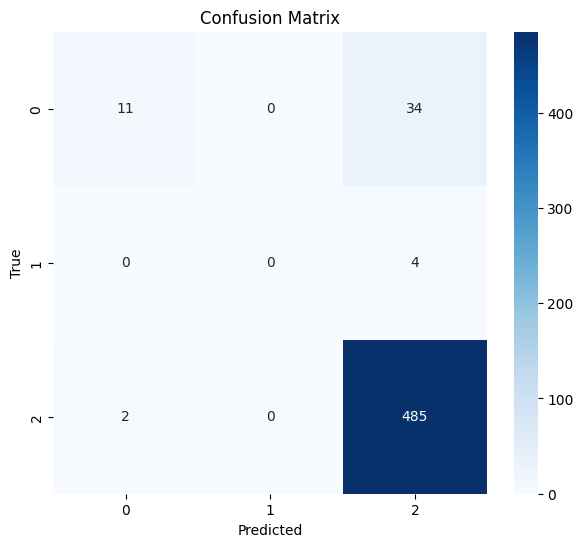

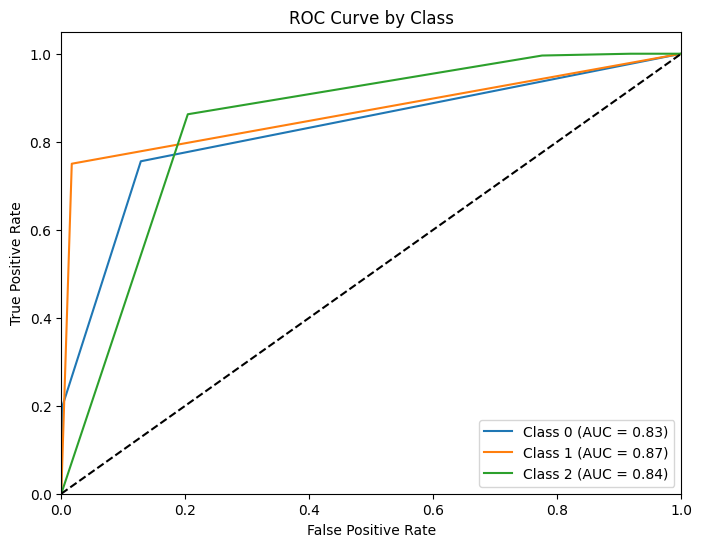

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve
)
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)
classes = np.unique(y_test)

# Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Weighted Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Weighted Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Weighted F1-score:", f1_score(y_test, y_pred, average='weighted'))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Binarize y_test for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=classes)

# ROC Curve and AUC per class
plt.figure(figsize=(8,6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by Class')
plt.legend(loc='lower right')
plt.show()


In [37]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Train on balanced training data
lgbm.fit(X_train_balanced, y_train_balanced)

# Predict on test set
y_pred = lgbm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 1747, number of used features: 10
[LightGBM] [Info] Start training from score -2.538402
[LightGBM] [Info] Start training from score -3.658993
[LightGBM] [Info] Start training from score -0.110653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9124767225325885
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.33      0.42        46
           1       0.00      0.00      0.00         2
           2       0.94      0.97      0.95       489

    accuracy                           0.91       537
   macro avg       0.51      0.43      0.46       537
weighted avg       0.90      0.91

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale features (fit scaler on train, apply to train and test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Initialize SVC (you can tune hyperparameters like kernel, C, gamma)
svc = SVC(probability=True, random_state=42)

# Train SVC
svc.fit(X_train_scaled, y_train_balanced)

# Predict on test data
y_pred = svc.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9106145251396648
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00         2
           2       0.91      1.00      0.95       489

    accuracy                           0.91       537
   macro avg       0.30      0.33      0.32       537
weighted avg       0.83      0.91      0.87       537



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train on balanced training data
xgb_clf.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred = xgb_clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9068901303538175
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.24      0.33        46
           1       0.00      0.00      0.00         2
           2       0.93      0.97      0.95       489

    accuracy                           0.91       537
   macro avg       0.48      0.40      0.43       537
weighted avg       0.89      0.91      0.89       537



In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale features (logistic regression benefits from scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train_scaled, y_train_balanced)

# Predict on test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9087523277467412
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.00      0.00      0.00         2
           2       0.91      1.00      0.95       489

    accuracy                           0.91       537
   macro avg       0.30      0.33      0.32       537
weighted avg       0.83      0.91      0.87       537



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
